# Klasifikasi Digit Tulisan Tangan menggunakan CNN

In [61]:
import tensorflow as tf #library mechine-learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt #untuk visualisasi data
%matplotlib inline

mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

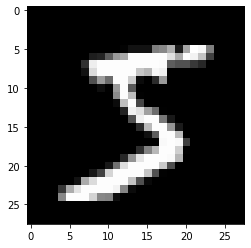

Citra digit angka 5


In [62]:
plt.imshow(x_train[0], cmap="gray") 
plt.show() 
print("Citra digit angka",y_train[0])

In [63]:
# konversi integers jadi floats
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
train_norm = x_train.astype('float32')
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)
test_norm = x_test.astype('float32')
# normalisasi ke range 0-1
x_train = train_norm / 255.0
x_test = test_norm / 255.0
# one hot encode nilai target
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [64]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(strides=2))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(strides=2))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=84, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation = 'softmax'))

model.summary() #menampilkan struktur model

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               48120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 120)              

In [65]:
history = model.fit(x=x_train, y=y_train_enc, epochs=20, callbacks=[es], validation_data=(x_test, y_test_enc)) 

Epoch 1/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2686 - accuracy: 0.9185 - val_loss: 0.0624 - val_accuracy: 0.9799
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0866 - accuracy: 0.9741 - val_loss: 0.0516 - val_accuracy: 0.9823
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0664 - accuracy: 0.9807 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0473 - accuracy: 0.9861 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0334 -

In [66]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test_enc)

# Tampilkan akurasi model
print('\nAkurasi testing:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0342 - accuracy: 0.9914

Akurasi testing: 0.9914000034332275


In [67]:
predictions = model.predict(x_test) 

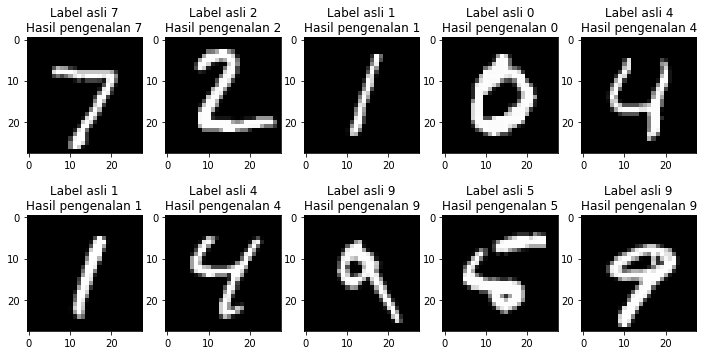

In [68]:
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='gray')
    ax.set(title = f"Label asli {y_test[i]}\nHasil pengenalan {predictions[i].argmax()}")

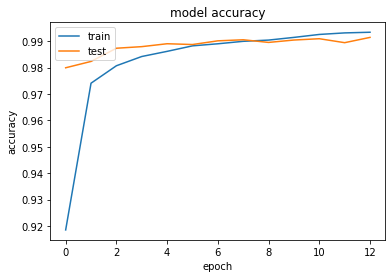

In [69]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

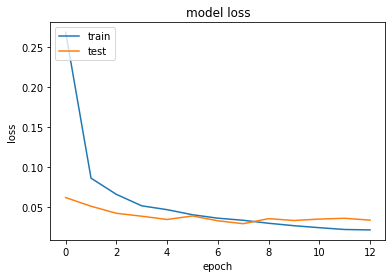

In [70]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()